# **AP155 Lab Assignment**
## Module 2: Solution of Linear and Nonlinear Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.



### Student Information

_Full Name (Last Name, First Name)_: Hojo, Hiroshi \
_Student No._: 202201830\
_Section_: TX - 1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/30
* Problem 2 - XX/30
* Problem 3 - XX/40



### PROBLEM 1

**Solve for eigenvalues and eigenvectors of a symmetric matrix**

1. Use numpy's $\tt linalg$ package to find the eigenvalues and eigenvectors of the ff. symmetrix matrix *(15 pts.)*:

$ \begin{equation}
{\bf A} =
\begin{pmatrix}
8 & -2 & -20 \\
-2 & -3 & -9 \\
-20 & -9 & -3
\end{pmatrix} \end{equation} $

2. Check your answer numerically; that is, check that $\bf AV = VD$, where the $N$ x $N$ matrix $\bf V$ has the eigenvectors as its columns and $\bf D$ is the diagonal matrix with the eigenvalues $\lambda_i$ as its diagonal entries. *(15 pts.)*

In [1]:
import numpy as np  #Importing NumPy library
from numpy.linalg import eigh  # Importing the eigh function to compute the eigenvalues and eigenvectors of a symmetric matrix

#Define a symmetric matrix A
A = np.array([[8, -2, -20],
             [-2, -3, -9],
             [-20, -9, -3]])

#Compute the eigenvalues (w) and eigenvectors (v) of matrix A using the eigh function
#Eigh is specifically optimized for Hermitian or symmetric matrices
w, v = eigh(A)

# Print the eigenvalues of matrix A
print(f'Eigenvalues of A : {w}')

# Print the eigenvectors of matrix A
print(f'Eigenvectors of A : {v}')

Eigenvalues of A : [-21.99606195   0.16021522  23.83584674]
Eigenvectors of A : [[ 0.52496527  0.36793396 -0.76748685]
 [ 0.40892672 -0.89987151 -0.15169114]
 [ 0.74645187  0.2342133   0.62285932]]


In [3]:
import numpy as np

#Define a symmetric matrix A
A = np.array([[8, -2, -20],
             [-2, -3, -9],
             [-20, -9, -3]])

#Compute the eigenvalues (w) and eigenvectors (v) of matrix A using the eigh function
w, v = eigh(A)

#Create a diagonal matrix D using the eigenvalues w
D = np.diag(w)

#Compute the matrix multiplication of A and v 
AV = np.dot(A, v)

#Compute the matrix multiplication of v and D
VD = np.dot(v, D)

#Print the result of A * v (which should equal v * D)
print('AV:', AV)

#Print the result of v * D (which should equal A * v)
print('VD:', VD)

#Showing that the eigenvector relationship holds
print(np.round(AV,6) == np.round(VD,6))
print('Thus showing that AV = VD')

AV: [[-11.54716868   0.05894862 -18.29369893]
 [ -8.99477756  -0.14417311  -3.61568676]
 [-16.4190016    0.03752454  14.8463793 ]]
VD: [[-11.54716868   0.05894862 -18.29369893]
 [ -8.99477756  -0.14417311  -3.61568676]
 [-16.4190016    0.03752454  14.8463793 ]]
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
Thus showing that AV = VD


In [5]:
import numpy as np
from numpy.linalg import qr

a = np.array([[8, -2, -20],
             [-2, -3, -9],
              [-20, -9, -3]])

q, r = qr(a)
print('Q :', q)
print('R :', r)

b = np.dot(q, r)
print('QR: ', b)

Q : [[-0.36980013 -0.86392404  0.34188173]
 [ 0.09245003 -0.40035504 -0.91168461]
 [ 0.92450033 -0.30553411  0.22792115]]
R : [[-21.63330765  -7.85825278   3.79045134]
 [  0.           5.67872021  21.79827851]
 [  0.           0.           0.68376346]]
QR:  [[  8.  -2. -20.]
 [ -2.  -3.  -9.]
 [-20.  -9.  -3.]]


In [7]:
import numpy as np
from numpy.linalg import qr

a = np.array([[8, -2, -20],
             [-2, -3, -9],
              [-20, -9, -3]])

p = [1, 5, 10, 20]
for i in range(20):
    q, r = qr(a)
    a = np.dot(r, q)
    if i+1 in p:
        print(f'iteration {i+1}:')
        print(a)

iteration 1:
[[10.77777778 20.67751348  0.63213954]
 [20.67751348 -8.93362193 -0.20891306]
 [ 0.63213954 -0.20891306  0.15584416]]
iteration 5:
[[ 1.58960169e+01  1.73452201e+01  1.38804074e-09]
 [ 1.73452201e+01 -1.40562321e+01 -9.56789838e-10]
 [ 1.38804535e-09 -9.56793413e-10  1.60215219e-01]]
iteration 10:
[[ 1.99037985e+01 -1.28355862e+01  1.06820802e-15]
 [-1.28355862e+01 -1.80640137e+01 -5.73241862e-15]
 [-2.00263427e-20 -2.49073788e-20  1.60215219e-01]]
iteration 20:
[[ 2.29890827e+01 -6.17185557e+00  1.97288752e-15]
 [-6.17185557e+00 -2.11492980e+01 -5.48718176e-15]
 [-3.90626543e-42 -1.20566033e-41  1.60215219e-01]]


### PROBLEM 2

**Solve a nonlinear equation using the relaxation method**

Consider the equation $x=1- e^{-cx}$, where $c$ is a known parameter and $x$ is unknown. This equation arises in a variety of situations, including the physics of contact processes, mathematical models of epidemics, and the theory of random graphs.

1. Write a program to solve this equation for $x$ using the relaxation method for the case $c = 2$. Calculate your solution to an accuracy of at least $10^{-6}$. *(10 pts.)*

2. Modify your program to calculate the solution for values of $c$ from 0 to 3 in steps of 0.01. *(10 pts.)*

3. Make a plot of $x$ as a function of $c$. Describe the different regimes that you see. *(10 pts.)*

In [9]:
from math import exp

#Initial guess for x
x0 = 1.0
tol = 1e-6  #Desired accuracy
c = 2  #constant value of c in the original equation
i = 0

while True:
    x = 1 - exp(-c * x0)
    i += 1
    #Check if the difference between successive values is smaller than the tolerance
    if abs(x - x0) < tol:
        print(f"x = {x}")
        break
    
    x0 = x
else:
    print("Does not converge.")

print(f'at {i} iterations')


x = 0.7968126311118457
at 14 iterations


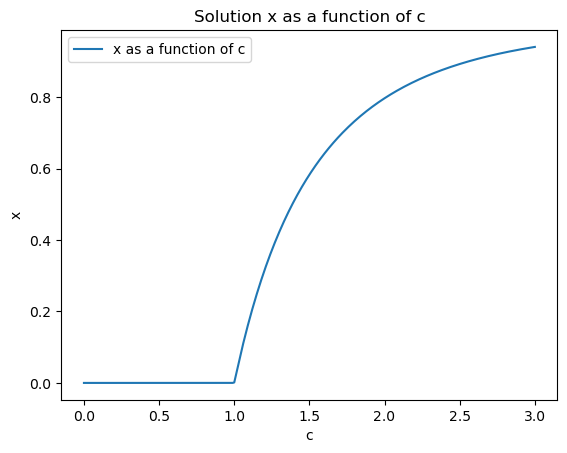

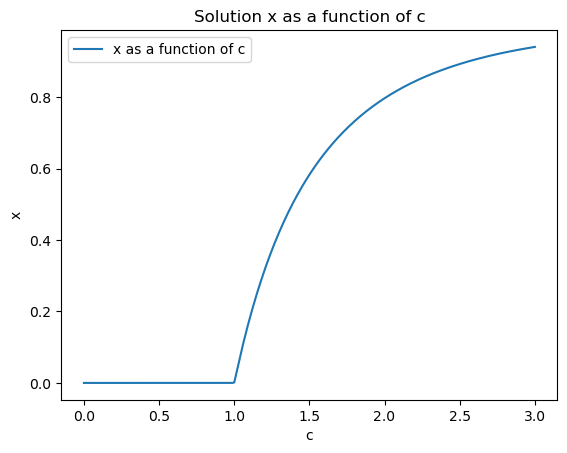

In [5]:
import matplotlib.pyplot as plt
from math import exp

#Define the function to compute the next iteration of x
def xiterations(c, x0, tol=1e-6):

    while True:
        x = 1 - exp(-c * x0)  #Update equation
        
        #Check if the difference between successive values is smaller than the tolerance
        if abs(x - x0) < tol:
            return x
        
        x0 = x  #Update x0 for the next iteration
    return x  #Return the last computed value if the loop does not converge


#Initialize lists to store values of c and corresponding x
x_values = []
c_values = [round(i * 0.01, 2) for i in range(301)]  #Values of c from 0 to 3 in steps of 0.01


#Iterate over values of c and compute the corresponding x
for c in c_values:
    x0 = 1.0  #Reset initial guess for each c
    x = xiterations(c, x0)  #Compute the solution for this c
    x_values.append(x)  #Store the computed x

#Plot x as a function of c
plt.plot(c_values, x_values, label="x as a function of c")
plt.xlabel('c')
plt.ylabel('x')
plt.title('Solution x as a function of c')
plt.legend()
plt.show()

import matplotlib.pyplot as plt
from math import exp

#Define the function to compute the next iteration of x
def xiterations(c, x0, tol=1e-6):

    while True:
        x = 1 - exp(-c * x0)  #Update equation
        
        #Check if the difference between successive values is smaller than the tolerance
        if abs(x - x0) < tol:
            return x
        
        x0 = x  #Update x0 for the next iteration
    return x  #Return the last computed value if the loop does not converge


#Initialize lists to store values of c and corresponding x
x_values = []
c_values = [round(i * 0.01, 2) for i in range(301)]  #Values of c from 0 to 3 in steps of 0.01


#Iterate over values of c and compute the corresponding x
for c in c_values:
    x0 = 0.1  #Reset initial guess for each c
    x = xiterations(c, x0)  #Compute the solution for this c
    x_values.append(x)  #Store the computed x

#Plot x as a function of c
plt.plot(c_values, x_values, label="x as a function of c")
plt.xlabel('c')
plt.ylabel('x')
plt.title('Solution x as a function of c')
plt.legend()
plt.show()



If we observe the behavior of the graph, we can see that when x starts initially at 0 and will only increase once c is 1.0 . When we simulate the equation with x initially starting closer and closer, but not at 0, we will still see the same jump at c = 1. only when x is at 0 will we observe that the loop will just keep outputting x = 0 and not increase from there no matter the c values. 

### PROBLEM 3

**Physics Application: Calculating the Lagrange point**

_Refer to Exercise 6.16 of the Newman text._ The $L_1$ Lagrange point is the point between the Earth and the Moon at which a satellite will orbit the Earth in perfect synchrony with the Moon, staying always in between the two.

Assuming circular orbits, and assuming that the Earth is much more massive than either the Moon or the satellite, the distance $r$ from the center of the Earth to the $L_1$ point satisfies
$$ \begin{equation}
\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,
\end{equation} $$
where $R$ is the distance from the Earth to the Moon, $M$ and $m$ are the Earth and Moon masses, $G$ is Newton's gravitational constant, and $\omega$ is the angular velocity of both the Moon and the satellite.

Use Newton's method to solve for the distance r from the Earth to the $L_1$ point. Compute a solution accurate to at least four significant figures.

In [3]:
#constants taken directly from Newman
G = 6.674 * 10**(-11)
M = 5.974 * 10**24
m = 7.348 * 10**22
R = 3.844 * 10**8
w = 2.662 * 10**(-6)
tol = 1e-4
r = 10000

def f(r): #define our function of r as the given equation
    return G*M/(r**2) - (G*m)/(R-r)**2 - (w**2)*r

def fprime(r): #define fprime as the first derivative of f(r)
    return -2*(G*M)/(r**3) - 2*(G*m)/(R-r)**3 - (w**2)

while True: #setup our loop in obtaining all iterations of r using Newton's method until it reaches a convergence point which is when abs(r2-r) is less than the tolerance 
    r2 = r #comparing our 'test' r to the set r
    r = r - f(r)/fprime(r) #Newton's method : rate of convergence, neglecting the error portion
    
    if abs(r2-r) < tol: #this condition is set to achieve at which distance r is most closest to the accuracy for this solution
      break  
        
print (round(r)) 
    
    

326045072
